In [232]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [233]:
# Dataset
x,y=make_regression(n_samples=100,n_features=1,noise=10)
y=y+abs(y/2)

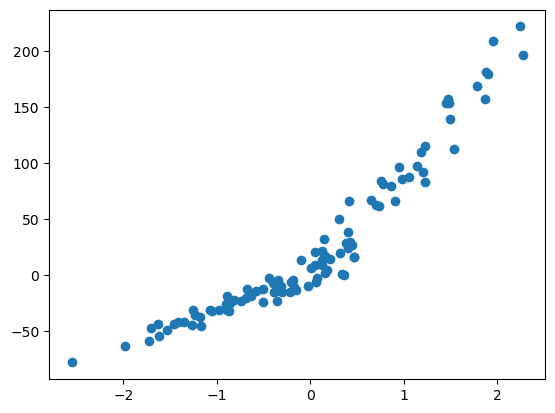

In [234]:
plt.scatter(x,y)

In [235]:
y=y.reshape(y.shape[0],1)

In [236]:
# matrice 
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))

In [237]:
np.random.seed(0)
theta = np.random.randn(3,1)

In [238]:
def model(X,theta):
    return X.dot(theta)

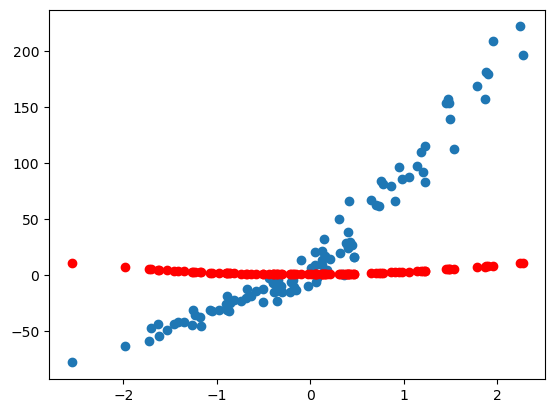

In [239]:
plt.scatter(x,y)
plt.scatter(x, model(X,theta), c='r')

In [240]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [241]:
cost_function(X,y,theta)

2499.6602596364355

In [242]:
def grad(X, y, theta):
    m=len(y)
    return 1/m*X.T.dot(model(X,theta)-y)

In [243]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_history[i] = cost_function(X,y,theta)

    return theta, cost_history

In [244]:
# training
n_iterations = 1000
learning_rate = 0.01
theta_final, cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)
predictions = model(X,theta_final)

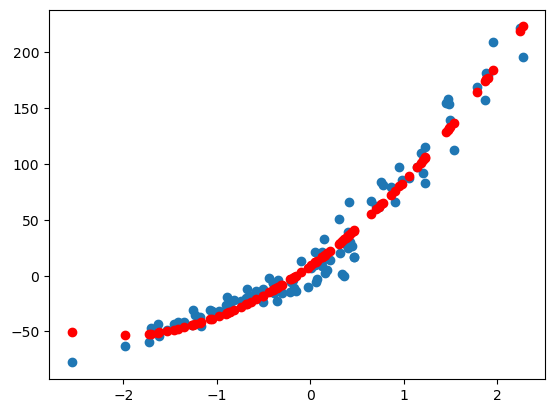

In [245]:
plt.scatter(x,y)
plt.scatter(x, predictions, c='r')

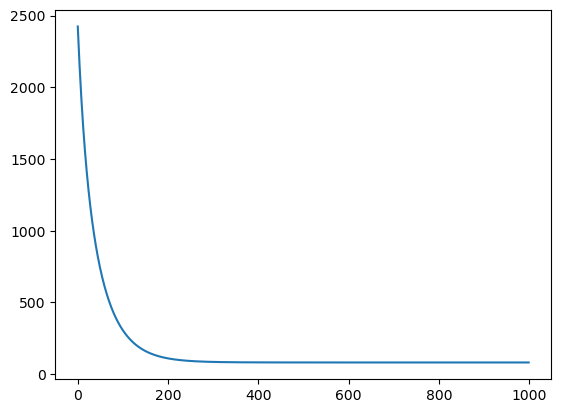

In [246]:
plt.plot(range(1000),cost_history)

In [247]:
def coef_determination(y, predictions):
    u = np.sum((y-predictions)**2)
    v = np.sum((y-np.mean(y))**2)
    return 1 - u/v

In [248]:
coef_determination(y,predictions)

0.9646444212008507